# MonteCarlo

Importacion

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import pandas as pd

Aleatorios

In [ ]:
random.seed(int(time.time())) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.24162759708086334

Función para obtener el valor numérico de una carta

In [ ]:
def valor_carta(carta):
    if carta in ['J', 'Q', 'K']:
        return 10
    elif carta == 'A':
        return 11
    else:
        return int(carta)

Creación de las barajas

In [ ]:
def nueva_baraja(n_barajas):
    baraja_unica = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K'] * 4
    baraja_total = baraja_unica * n_barajas
    random.shuffle(baraja_total)
    return baraja_total

Se determina el valor de la mano dependiendo del valor preferible para las A´s

In [ ]:

def total(mano):
    total = sum(valor_carta(c) for c in mano)
    ases = mano.count('A')
    while total > 21 and ases:
        total -= 10
        ases -= 1
    return total


Simulación de n juegos con las cartas dadas

In [ ]:

def simular_jugada(cartas_jugador, carta_crupier_visible, accion, barajas, n_sim=1000):
     ganancias = 0
     baraja = barajas.copy()
     for _ in range(n_sim):
        baraja = barajas.copy()
        random.shuffle(baraja)

        # Remover cartas ya en juego
        for c in cartas_jugador + [carta_crupier_visible]:
            if c in baraja:
                baraja.remove(c)

        jugador = cartas_jugador.copy()
        crupier = [carta_crupier_visible, baraja.pop()]

        # Acción del jugador
        if accion == "pedir":
            jugador.append(baraja.pop())
        elif accion == "doblar":
            jugador.append(baraja.pop())

        jugador_total = total(jugador)
        if jugador_total > 21:
            ganancias -= 2 if accion == "doblar" else 1
            continue

        # Juega el crupier
        while total(crupier) < 17:
            if len(baraja) < 1:
                continue  # No se puede pedir más
            crupier.append(baraja.pop())
        crupier_total = total(crupier)

        if jugador_total > crupier_total or crupier_total > 21:
            ganancias += 2 if accion == "doblar" else 1
           # ganancias += 1
        elif jugador_total == crupier_total:
            ganancias += 0
        else:
           ##ganancias -= 1
            ganancias -= 2 if accion == "doblar" else 1

     return ganancias / n_sim

Accion con mayor probabilidad

In [ ]:
def obtener_mejor_opcion(cartas_jugador, carta_crupier, baraja):
    r_plantarse = simular_jugada(cartas_jugador, carta_crupier, "plantarse", baraja)
    r_pedir = simular_jugada(cartas_jugador, carta_crupier, "pedir",baraja)
    r_doblar = simular_jugada(cartas_jugador, carta_crupier, "doblar", baraja)

    mejor_accion = max(
        [("S", r_plantarse), ("H", r_pedir), ("D", r_doblar)],
        key=lambda x: x[1]
    )
    return mejor_accion

Ejecución de prueba

In [ ]:
r= simular_jugada([10,1], 1, "pedir", nueva_baraja(5))
print(r)

0.096


In [ ]:
def generar_tabla_decision_con_probabilidades(baraja):
    cartas_posibles = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    combinaciones_jugador = list(itertools.combinations_with_replacement(cartas_posibles, 2))
    resultados = []

    for mano in combinaciones_jugador:
        fila = []
        for carta in cartas_posibles:
            r_plantarse = simular_jugada(list(mano), carta, "plantarse", baraja)
            r_pedir = simular_jugada(list(mano), carta, "pedir", baraja)
            r_doblar = simular_jugada(list(mano), carta, "doblar", baraja)

            mejor_accion = max([("S", r_plantarse), ("H", r_pedir), ("D", r_doblar)], key=lambda x: x[1])
            texto_celda = f"{mejor_accion[0]}:{mejor_accion[1]:.2f}"
            fila.append(texto_celda)
        resultados.append(fila)

    combinaciones_labels = [f"{a}-{b}" for a, b in combinaciones_jugador]
    graficar_heatmap_resultados(pd.DataFrame(resultados, index=combinaciones_labels, columns=cartas_posibles))
    return pd.DataFrame(resultados, index=combinaciones_labels, columns=cartas_posibles)

In [ ]:
def graficar_heatmap_resultados(df_resultados):
    # Extraer valores numéricos para el heatmap
    mapa_valores = df_resultados.applymap(lambda x: float(x.split(":")[1]))

    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 26))
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    ax = sns.heatmap(
        mapa_valores,
        annot=df_resultados,
        fmt='',
        cmap=cmap,
        linewidths=.5,
        linecolor='gray',
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'Probabilidad de Ganar'}
    )

    ax.set_xlabel("Carta del Crupier")
    ax.set_ylabel("Cartas del Jugador")
    ax.set_title("Decisión óptima con probabilidad de ganancia\n(S=Plantarse, H=Pedir, D=Doblar)")
    plt.tight_layout()
    plt.show()


<ipython-input-9-9a225f6669a8>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapa_valores = df_resultados.applymap(lambda x: float(x.split(":")[1]))


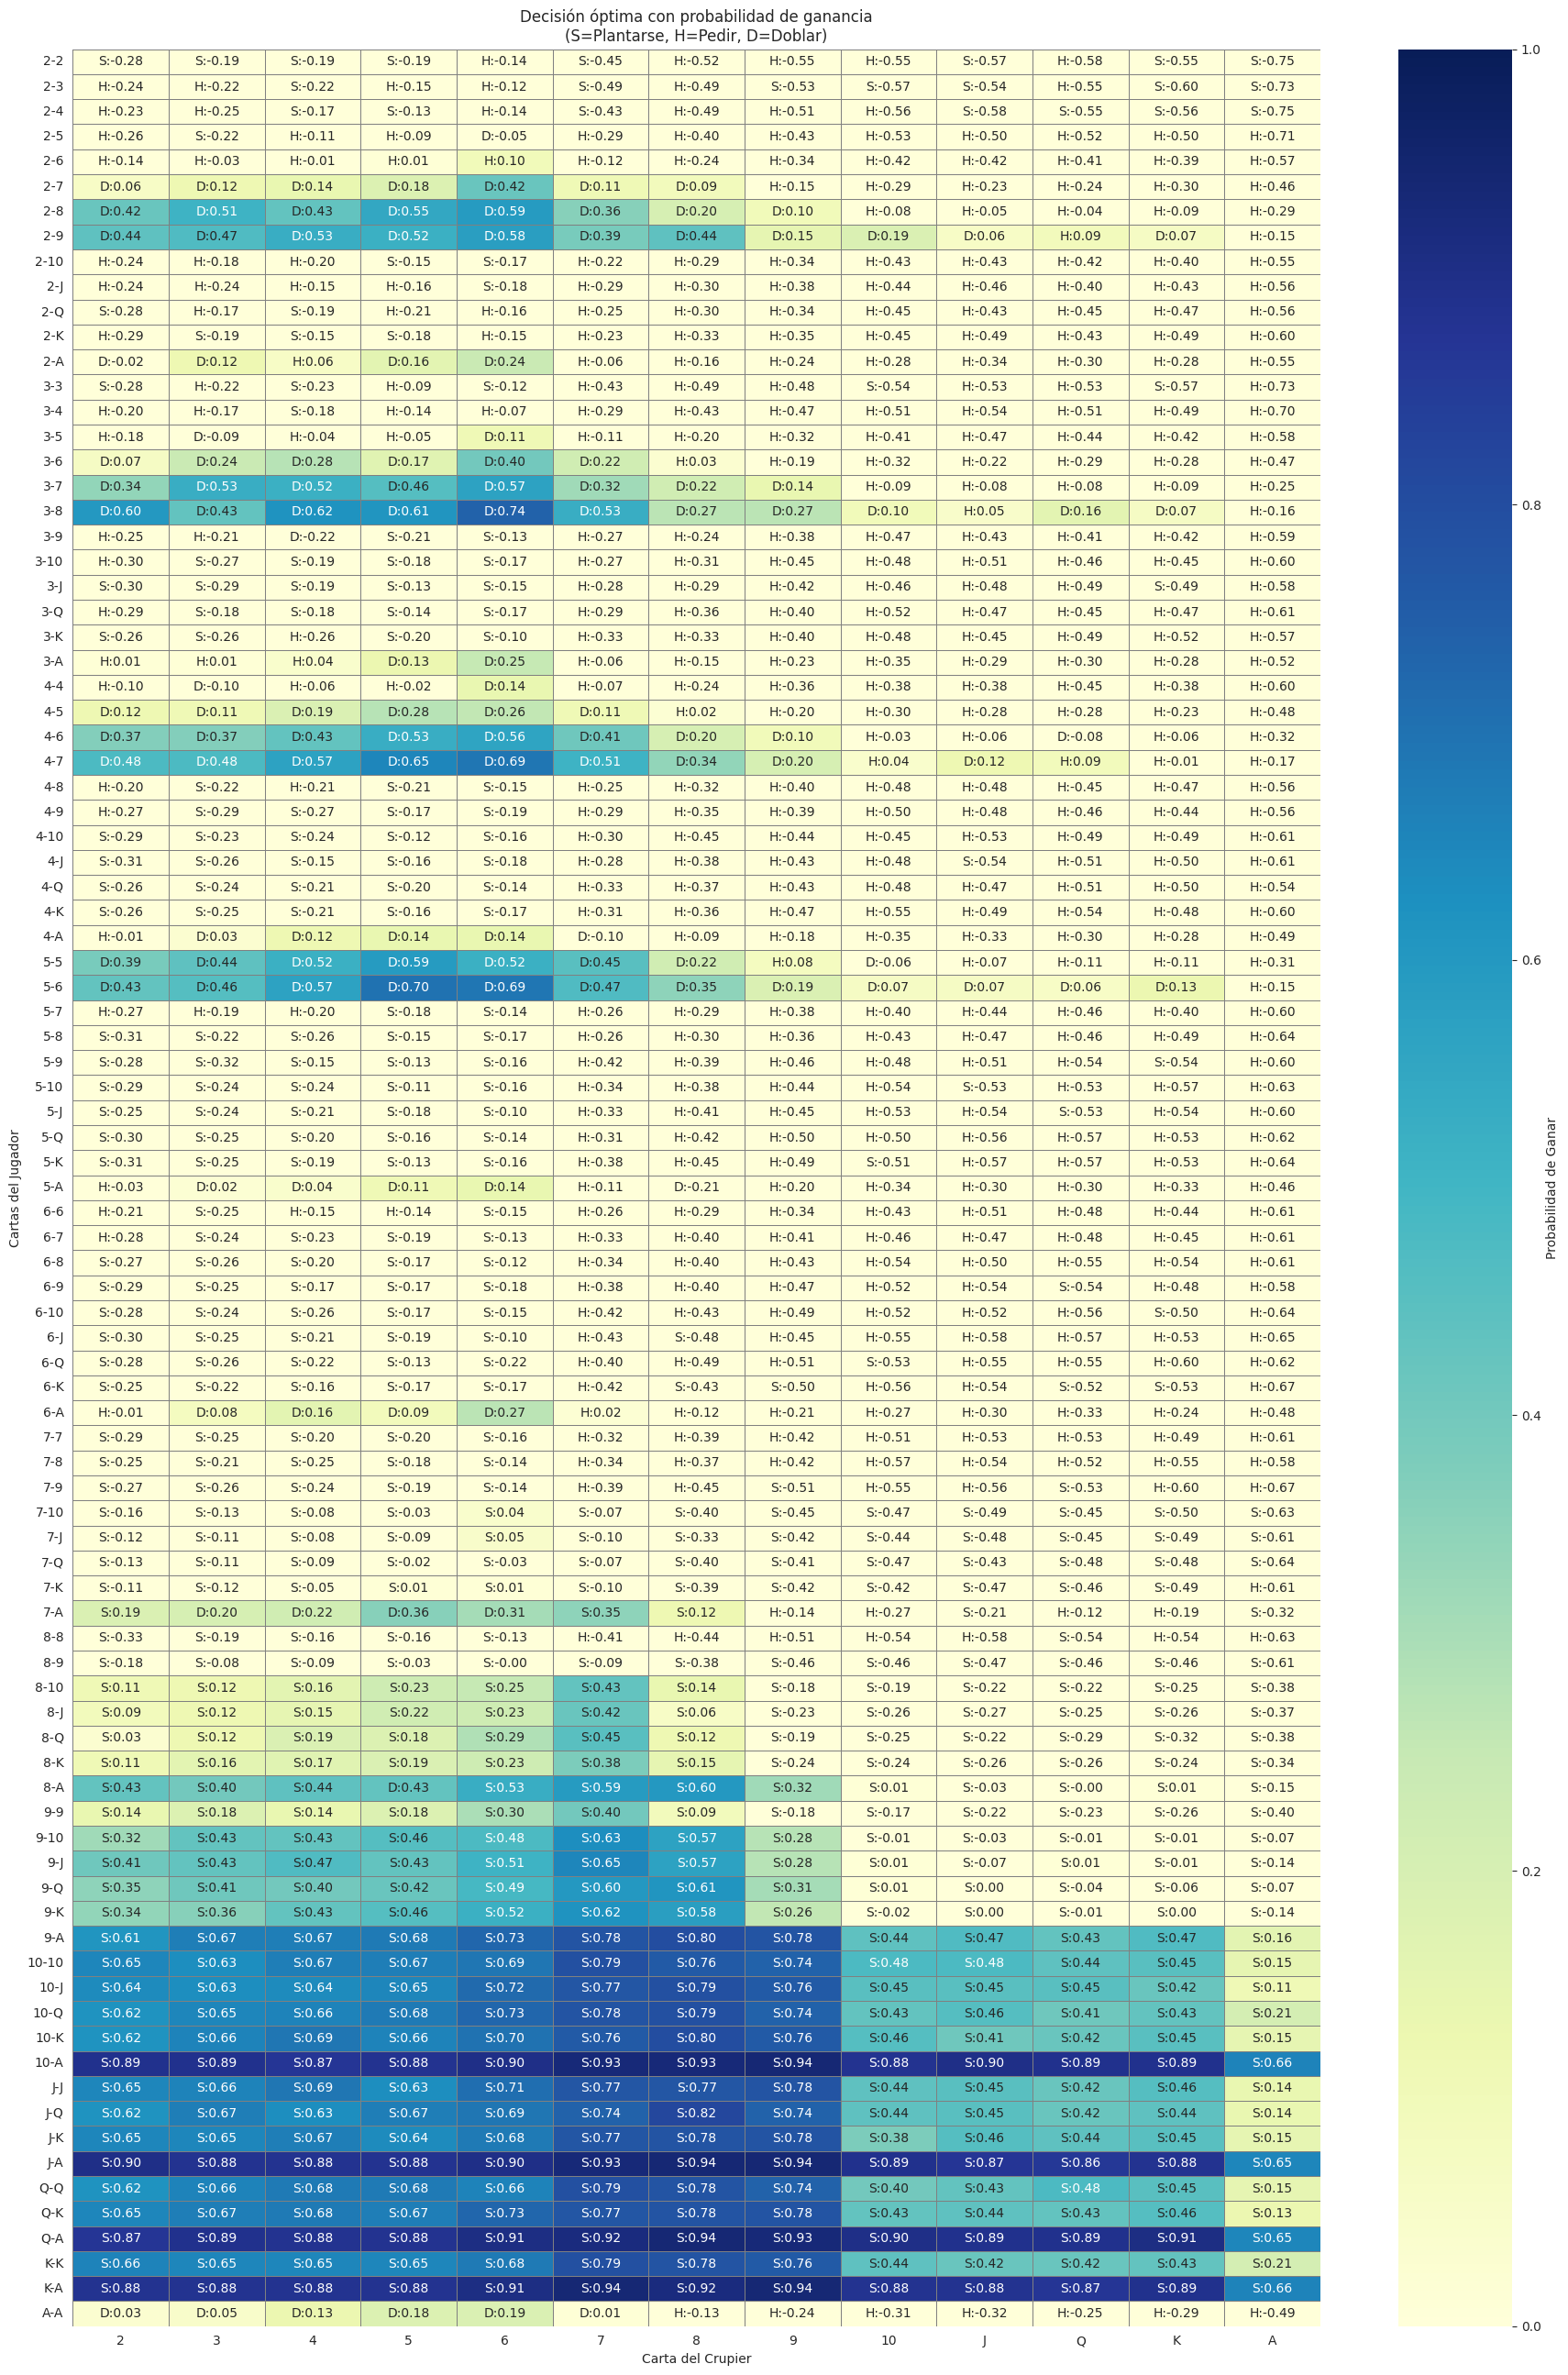

,2,3,4,5,6,7,8,9,10,J,Q,K,A
2-2,S:-0.28,S:-0.19,S:-0.19,S:-0.19,H:-0.14,S:-0.45,H:-0.52,H:-0.55,H:-0.55,S:-0.57,H:-0.58,S:-0.55,S:-0.75
2-3,H:-0.24,H:-0.22,S:-0.22,H:-0.15,H:-0.12,S:-0.49,H:-0.49,S:-0.53,S:-0.57,S:-0.54,H:-0.55,S:-0.60,S:-0.73
2-4,H:-0.23,H:-0.25,S:-0.17,S:-0.13,H:-0.14,S:-0.43,H:-0.49,H:-0.51,H:-0.56,S:-0.58,S:-0.55,S:-0.56,S:-0.75
2-5,H:-0.26,S:-0.22,H:-0.11,H:-0.09,D:-0.05,H:-0.29,H:-0.40,H:-0.43,H:-0.53,H:-0.50,H:-0.52,H:-0.50,H:-0.71
2-6,H:-0.14,H:-0.03,H:-0.01,H:0.01,H:0.10,H:-0.12,H:-0.24,H:-0.34,H:-0.42,H:-0.42,H:-0.41,H:-0.39,H:-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q-K,S:0.65,S:0.67,S:0.68,S:0.67,S:0.73,S:0.77,S:0.78,S:0.78,S:0.43,S:0.44,S:0.43,S:0.46,S:0.13
Q-A,S:0.87,S:0.89,S:0.88,S:0.88,S:0.91,S:0.92,S:0.94,S:0.93,S:0.90,S:0.89,S:0.89,S:0.91,S:0.65
K-K,S:0.66,S:0.65,S:0.65,S:0.65,S:0.68,S:0.79,S:0.78,S:0.76,S:0.44,S:0.42,S:0.42,S:0.43,S:0.21
K-A,S:0.88,S:0.88,S:0.88,S:0.88,S:0.91,S:0.94,S:0.92,S:0.94,S:0.88,S:0.88,S:0.87,S:0.89,S:0.66


In [ ]:
generar_tabla_decision_con_probabilidades(nueva_baraja(1))

In [ ]:
def capturar_y_llamar():
    # Capturar lista con dos números
    lista = []
    print("Ingresa tus dos cartas:")
    for i in range(2):
        valor = (input(f"Elemento {i+1}: ")).strip().upper()
        lista.append(valor)

    # Capturar los otros dos enteros
    a = (input("Ingresa carta crupier: ")).strip().upper()

    # Llamar a la función con lo capturado
    resultado = obtener_mejor_opcion(lista, a, baraja)
    print("Resultado:", resultado)

In [ ]:
# Ejecutar método
capturar_y_llamar()

In [ ]:
def repartir_carta(baraja):
    return baraja.pop()

# Prueba de juego simulacion

In [ ]:
# ---------- Simulación de un juego ----------

def jugar_una_mano(apuesta, baraja):
    jugador = [repartir_carta(baraja), repartir_carta(baraja)]
    crupier = [repartir_carta(baraja), repartir_carta(baraja)]

    # Turno del jugador
    accion = obtener_mejor_opcion(jugador, crupier[0], baraja)

    while accion == "Hit":
        jugador.append(repartir_carta(baraja))
        if total(jugador) > 21:
            return -apuesta  # Jugador pierde
        accion = obtener_mejor_opcion(jugador, crupier[0], baraja)

    # Turno del crupier
    while total(crupier) < 17:
        crupier.append(repartir_carta(baraja))

    valor_jugador = total(jugador)
    valor_crupier = total(crupier)

    if accion == "Double":
       apuesta *= 2

    if valor_crupier > 21 or valor_jugador > valor_crupier:
        return apuesta  # Jugador gana
    elif valor_jugador < valor_crupier:
        return -apuesta  # Jugador pierde
    else:
        return 0  # Empate


In [ ]:
# ---------- Simulación múltiple con gráfica ----------

def simular_juegos(n_juegos, apuesta=10, dinero_inicial=100):
    dinero = dinero_inicial
    historial_dinero = [dinero]
    baraja = nueva_baraja(4)
    fois=1
    for i in range(n_juegos):

        # if len(baraja) < num and fois == 1:  # por ejemplo, si quedan menos de 15 cartas
        #   fois=0;
        #   print("Cards left: ")
        #   print(len(baraja))
        #   generar_tabla_decision_con_probabilidades(baraja)


        if len(baraja) < 15:  # por ejemplo, si quedan menos de 15 cartas
          baraja = nueva_baraja(8)

        resultado = jugar_una_mano(apuesta, baraja)
        dinero += resultado
        historial_dinero.append(dinero)

    # Gráfica
    plt.figure(figsize=(10,5))
    plt.plot(range(n_juegos + 1), historial_dinero, linestyle='-')
    plt.title(f"Evolución del Dinero en {n_juegos} Juegos de Blackjack")
    plt.xlabel("Número de Juegos")
    plt.ylabel("Dinero del Jugador")
    plt.grid(True)
    plt.show()



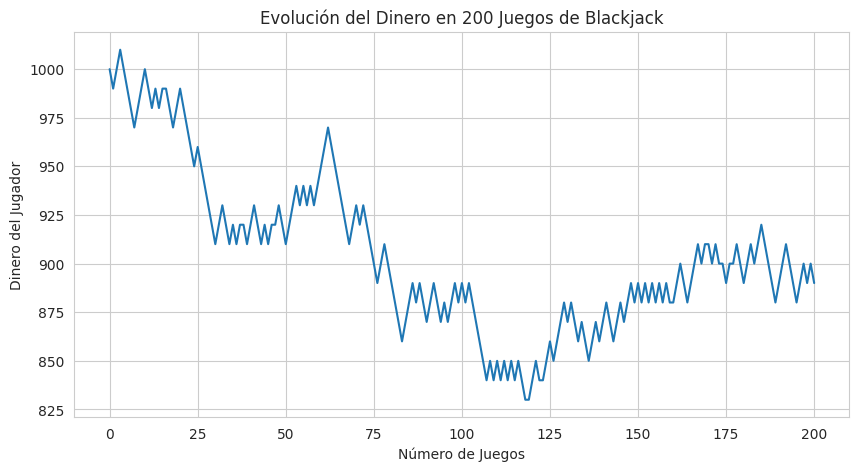

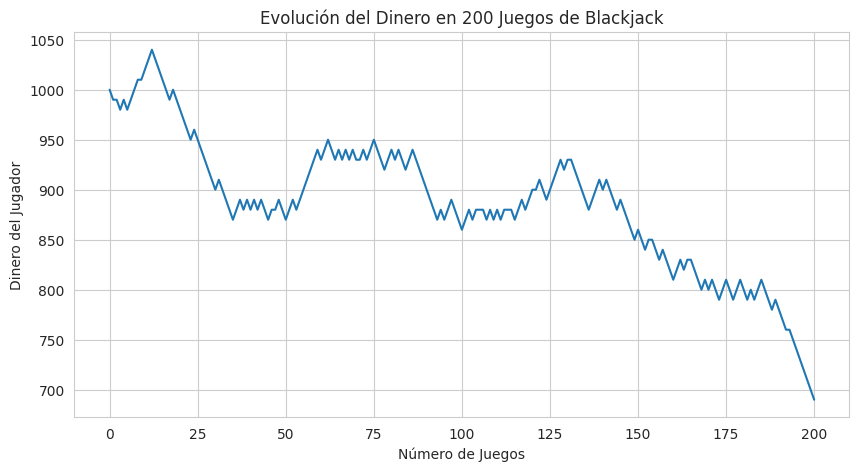

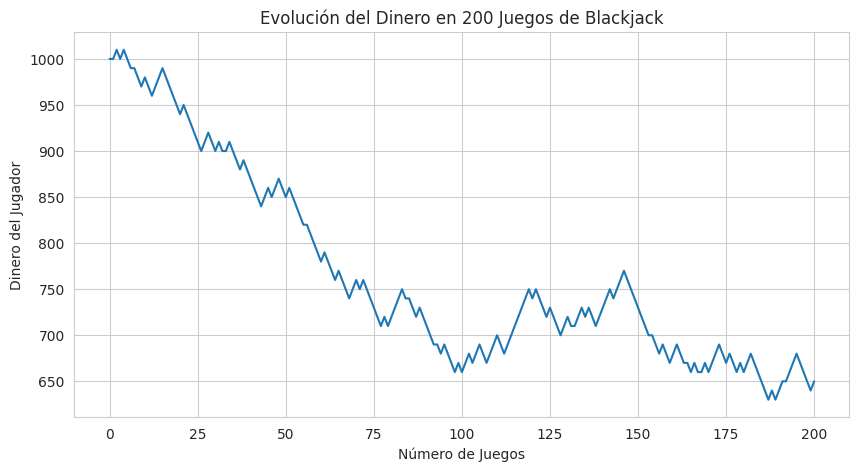

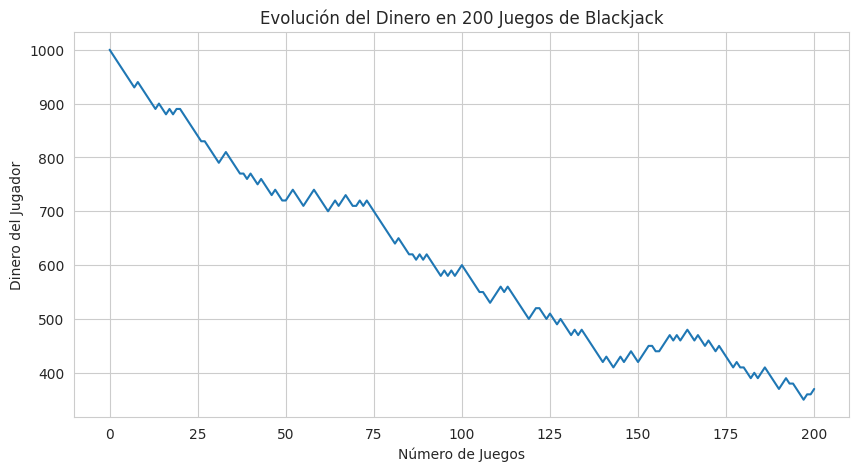

In [ ]:
# ---------- Ejecutar Simulación ----------
simular_juegos(n_juegos=200, apuesta=10, dinero_inicial=1000)
# ---------- Ejecutar Simulación ----------
simular_juegos(n_juegos=200, apuesta=10, dinero_inicial=1000)
# ---------- Ejecutar Simulación ----------
simular_juegos(n_juegos=200, apuesta=10, dinero_inicial=1000)
# ---------- Ejecutar Simulación ----------
simular_juegos(n_juegos=200, apuesta=10, dinero_inicial=1000)


# Prueba del juego con datos ingresados

In [ ]:
def capturar_y_llamar():
    baraja=nueva_baraja(4)
    # Capturar lista con dos números
    lista = []
    print("Ingresa tus dos cartas:")
    for i in range(2):
        valor = (input(f"Elemento {i+1}: ")).strip().upper()
        lista.append(valor)

    # Capturar los otros dos enteros
    a = (input("Ingresa carta crupier: ")).strip().upper()

    # Llamar a la función con lo capturado
    resultado = obtener_mejor_opcion(lista, a, baraja)
    print("Resultado:", resultado)

In [ ]:
3# Ejecutar método
capturar_y_llamar()

Ingresa tus dos cartas:
Elemento 1: 5
Elemento 2: 6
Ingresa carta crupier: 3
Resultado: ('D', 0.614)
